In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import numpy as np 
import cv2
import os
import random
import matplotlib.pyplot as plt 
import pickle
from multiprocessing import Pool, Manager, cpu_count, Lock
import pickle
import keras 
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation,Dropout
import keras.losses
import time
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,AveragePooling2D, Dense

In [72]:
from keras_preprocessing.image import ImageDataGenerator

In [73]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [74]:
train_generator = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/data/train",target_size=(224,224),batch_size=32)

Found 25331 images belonging to 7 classes.


In [75]:
val_generator = val_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/data/val",target_size=(224,224),batch_size=32)

Found 5844 images belonging to 7 classes.


In [77]:
for data_batch,label_batch in train_generator:
  print(data_batch.shape)
  print(label_batch.shape)
  break

(32, 224, 224, 3)
(32, 7)


In [96]:
model = Sequential()
width = 224
height = 224
classes = 7

In [97]:
shape = (width, height, 3)

In [98]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(258))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(classes))
model.add(Activation("softmax"))

In [99]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
activation_117 (Activation)  (None, 224, 224, 32)      0         
_________________________________________________________________
batch_normalization_80 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
activation_118 (Activation)  (None, 224, 224, 32)      0         
_________________________________________________________________
batch_normalization_81 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 112, 112, 32)    

In [100]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [101]:
 history = model .fit(train_generator,epochs=30, validation_data =val_generator,batch_size=32,verbose = 1) 

Epoch 1/30
792/792 [==============================] - 148s 185ms/step - loss: 1.4901 - accuracy: 0.4761 - val_loss: 1.1639 - val_accuracy: 0.5652
Epoch 2/30
792/792 [==============================] - 148s 187ms/step - loss: 1.0173 - accuracy: 0.6090 - val_loss: 0.9229 - val_accuracy: 0.6588
Epoch 3/30
792/792 [==============================] - 147s 185ms/step - loss: 0.8560 - accuracy: 0.6725 - val_loss: 0.7630 - val_accuracy: 0.6973
Epoch 4/30
792/792 [==============================] - 147s 185ms/step - loss: 0.7646 - accuracy: 0.7024 - val_loss: 0.8475 - val_accuracy: 0.6778
Epoch 5/30
792/792 [==============================] - 147s 185ms/step - loss: 0.7099 - accuracy: 0.7278 - val_loss: 0.6375 - val_accuracy: 0.7580
Epoch 6/30
792/792 [==============================] - 147s 185ms/step - loss: 0.6543 - accuracy: 0.7484 - val_loss: 0.6689 - val_accuracy: 0.7572
Epoch 7/30
792/792 [==============================] - 147s 185ms/step - loss: 0.5865 - accuracy: 0.7739 - val_loss: 0.5819 -

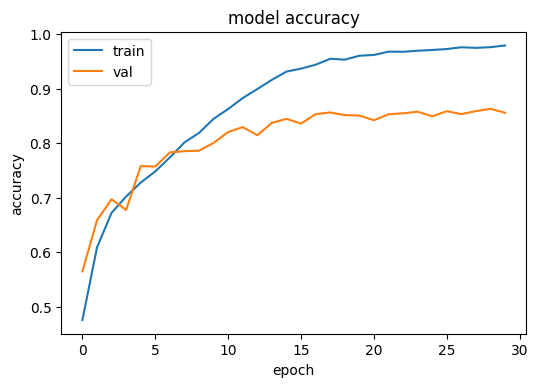

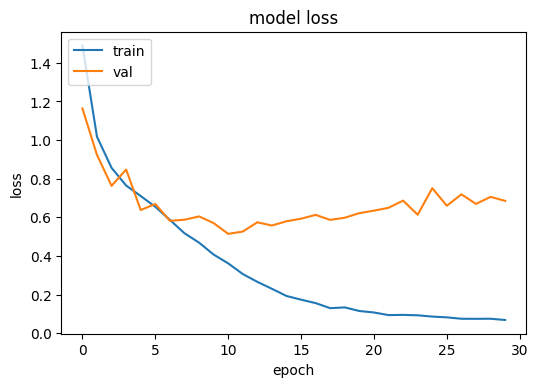

In [103]:
plt.figure(figsize = (6,4),dpi=100)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize = (6,4),dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [115]:
test_generator = test_datagen.flow_from_directory(directory="/content/drive/MyDrive/Miczone/fingerprint/data/test",target_size=(224,224),batch_size=7795,class_mode="sparse")

Found 7795 images belonging to 7 classes.


In [ ]:
for Xtest,Ytest in test_generator:
  X_test = Xtest
  Y_test = Ytest
  break

In [ ]:
pred = model.predict(Xtest)
pred_idx = np.argmax(pred, axis=1)

In [ ]:
print(classification_report(Y_test, pred_idx))

In [ ]:
import pandas as pd
import seaborn as sns
cm = confusion_matrix(Y_test,pred_idx)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cmn, index=['ARCH', 'RL','UL','WCDI','WE',"WPL","WST"], columns=['ARCH', 'RL','UL','WCDI','WE',"WPL","WST"])
plt.figure(figsize = (8,4.5),dpi=100)
sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='.2%')
plt.show()